# Flowers Recognition
![](https://storage.googleapis.com/kaggle-datasets-images/8782/12270/c3af536d14e386a2bfd356d1cd84b67e/dataset-cover.jpg?t=2018-01-06-14-10-54)

[This dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
) contains 4242 images of flowers.

### Content

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

### Acknowledgements

The data collection is based on scraped data from flickr, google images, and yandex images.

https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

In [1]:
from tensorflow.data import Dataset

2023-12-08 09:02:40.062844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[api_docs/tf/keras/utils/image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)

In [26]:
from tensorflow.keras.preprocessing import image_dataset_from_directory as get_data

data_dir = 'Data/flowers'

batch_size = 32
img_size = (224, 224)

train_ds = get_data(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

class_names = flowers.class_names
print("Class Names:", class_names)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


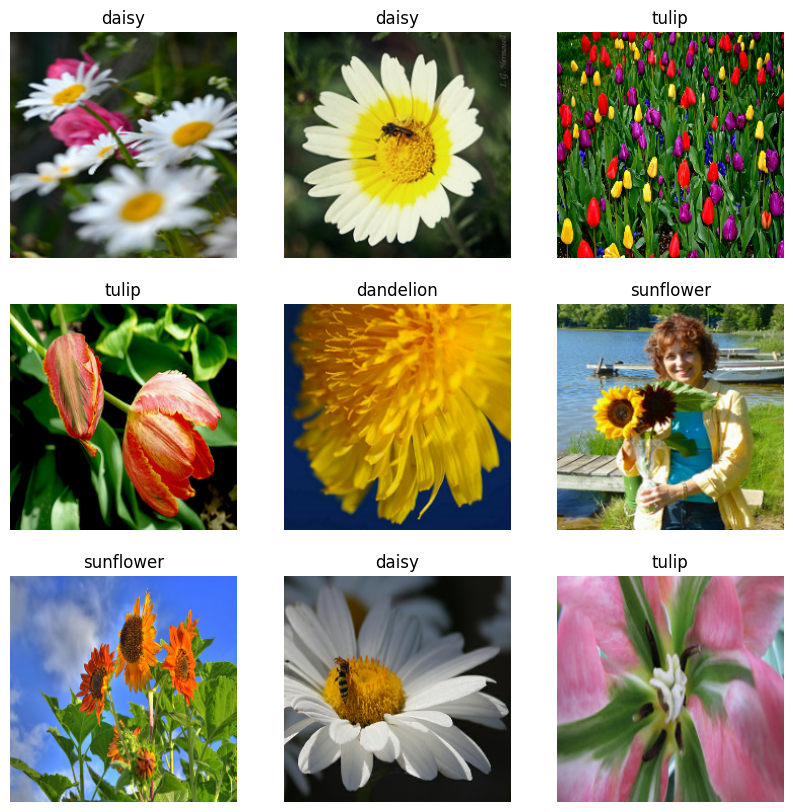

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
108/108 [==============================] - 71s 606ms/step - loss: 1.4361 - accuracy: 0.3987 - val_loss: 1.0673 - val_accuracy: 0.5550
Epoch 2/10
108/108 [==============================] - 62s 579ms/step - loss: 1.0280 - accuracy: 0.6016 - val_loss: 0.8644 - val_accuracy: 0.6790
Epoch 3/10
108/108 [==============================] - 74s 687ms/step - loss: 0.8030 - accuracy: 0.6983 - val_loss: 0.7025 - val_accuracy: 0.7486
Epoch 4/10
108/108 [==============================] - 66s 610ms/step - loss: 0.5868 - accuracy: 0.7814 - val_loss: 0.4962 - val_accuracy: 0.8250
Epoch 5/10
108/108 [==============================] - 65s 601ms/step - loss: 0.3287 - accuracy: 0.8842 - val_loss: 0.3705 - val_accuracy: 0.9038
Epoch 6/10
108/108 [==============================] - 62s 574ms/step - loss: 0.1894 - accuracy: 0.9412 - val_loss: 0.4395 - val_accuracy: 0.8934
Epoch 7/10
108/108 [==============================] - 60s 559ms/step - loss: 0.0857 - accuracy: 0.9754 - val_loss: 0.3659 - val_ac

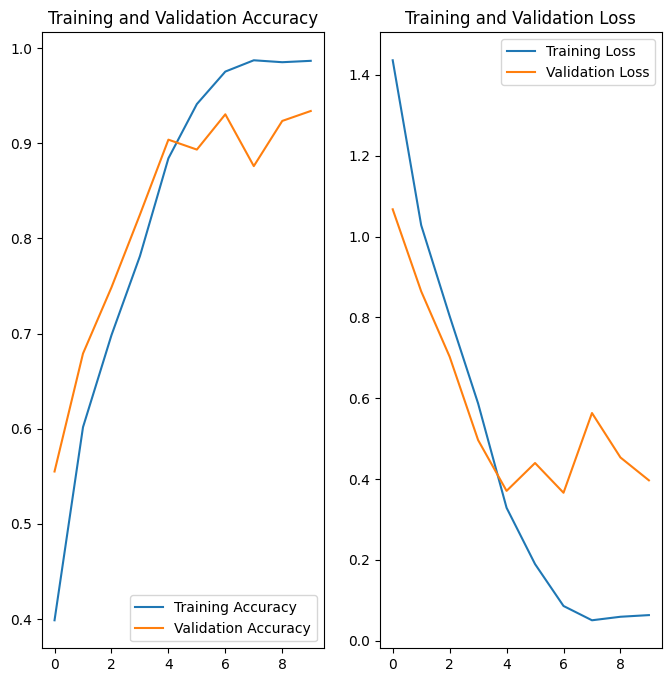

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()